# PROJET FINAL MAG3 : Prédictions de cotes 
## DIFERNAND Audrey, SAUGEY Marie 

Pour ce projet, nous avons choisi de nous intéresser aux matchs de Premier League, championnat de football en Angleterre entre 2006 et 2016. Nous utilisons deux bases de données différentes: la première est la table "stats" avec des données sur chaque équipe, chaque saison de 2006-2007 à 2016-2017, le deuxième type de bases de données concerne des tables par saison, récapitulant les données par match où se trouve les données sur les côtes de paris sportifs. Dans un premier temps, on organisera les données afin de pouvoir les utiliser correctement. Puis, nous réaliserons quelques statistiques descriptives. Enfin, nous tenterons de prédire la côte au temps t à partir de variables au temps t-1, notamment de la côte au temps t-1.

### Data Preparation

#### Importation des packages nécessaires

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np 
%matplotlib inline

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
import  statsmodels.formula.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix  

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

import seaborn as sns

import statsmodels.api as sm

#### Importation des données 

In [2]:
stats = pd.read_csv('stats.csv', sep=";")

In [3]:
odd6= pd.read_csv('E6.csv',sep=';')
odd7= pd.read_csv('E7.csv',sep=';')
odd8= pd.read_csv('E8.csv',sep=';')
odd9= pd.read_csv('E9.csv',sep=';')
odd10= pd.read_csv('E10.csv',sep=';')
odd11= pd.read_csv('E11.csv',sep=';')
odd12= pd.read_csv('E12.csv',sep=';')
odd13= pd.read_csv('E13.csv',sep=';')
odd14= pd.read_csv('E14.csv',sep=';')
odd15= pd.read_csv('E15.csv',sep=';')
odd16= pd.read_csv('E16.csv',sep=';')

#### Nettoyage des tables 

On ne garde que les variables qui nous intéressent : la date et le résultat du match, l'équipe à domicile, l'équipe à l'extérieur, le nombre de buts, de tirs, de tirs cadrés, de corners, de fautes, de cartons jaunes, de cartons rouges pour les deux équipes. Nous avons également le nombre de buts et le résultat à la mi-temps et les côtes de paris sportifs sur BET365.

In [4]:
odd6 = odd6[['Date','HomeTeam','AwayTeam','FTHG','FTAG','FTR','HTHG','HTAG','HTR','Referee','HS',
            'AS','HST','AST','HC','AC','HF','AF','HY','AY','HR','AR','B365H','B365A','B365D',
            'BbMxH','BbAvH','BbMxD','BbAvD','BbMxA','BbAvA',
            'BbMx>2.5', 'BbAv>2.5', 'BbMx<2.5', 'BbAv<2.5']]
odd7 = odd7[['Date','HomeTeam','AwayTeam','FTHG','FTAG','FTR','HTHG','HTAG','HTR','Referee','HS',
            'AS','HST','AST','HC','AC','HF','AF','HY','AY','HR','AR','B365H','B365A','B365D',
            'BbMxH','BbAvH','BbMxD','BbAvD','BbMxA','BbAvA',
            'BbMx>2.5', 'BbAv>2.5', 'BbMx<2.5', 'BbAv<2.5']]
odd8 = odd8[['Date','HomeTeam','AwayTeam','FTHG','FTAG','FTR','HTHG','HTAG','HTR','Referee','HS',
            'AS','HST','AST','HC','AC','HF','AF','HY','AY','HR','AR','B365H','B365A','B365D',
            'BbMxH','BbAvH','BbMxD','BbAvD','BbMxA','BbAvA',
            'BbMx>2.5', 'BbAv>2.5', 'BbMx<2.5', 'BbAv<2.5']]
odd9 = odd9[['Date','HomeTeam','AwayTeam','FTHG','FTAG','FTR','HTHG','HTAG','HTR','Referee','HS',
            'AS','HST','AST','HC','AC','HF','AF','HY','AY','HR','AR','B365H','B365A','B365D',
            'BbMxH','BbAvH','BbMxD','BbAvD','BbMxA','BbAvA',
            'BbMx>2.5', 'BbAv>2.5', 'BbMx<2.5', 'BbAv<2.5']]
odd10 = odd10[['Date','HomeTeam','AwayTeam','FTHG','FTAG','FTR','HTHG','HTAG','HTR','Referee','HS',
            'AS','HST','AST','HC','AC','HF','AF','HY','AY','HR','AR','B365H','B365A','B365D',
              'BbMxH','BbAvH','BbMxD','BbAvD','BbMxA','BbAvA',
              'BbMx>2.5', 'BbAv>2.5', 'BbMx<2.5', 'BbAv<2.5']]
odd11 = odd11[['Date','HomeTeam','AwayTeam','FTHG','FTAG','FTR','HTHG','HTAG','HTR','Referee','HS',
            'AS','HST','AST','HC','AC','HF','AF','HY','AY','HR','AR','B365H','B365A','B365D',
              'BbMxH','BbAvH','BbMxD','BbAvD','BbMxA','BbAvA',
              'BbMx>2.5', 'BbAv>2.5', 'BbMx<2.5', 'BbAv<2.5']]
odd12 = odd12[['Date','HomeTeam','AwayTeam','FTHG','FTAG','FTR','HTHG','HTAG','HTR','Referee','HS',
            'AS','HST','AST','HC','AC','HF','AF','HY','AY','HR','AR','B365H','B365A','B365D',
              'BbMxH','BbAvH','BbMxD','BbAvD','BbMxA','BbAvA',
              'BbMx>2.5', 'BbAv>2.5', 'BbMx<2.5', 'BbAv<2.5']]
odd13 = odd13[['Date','HomeTeam','AwayTeam','FTHG','FTAG','FTR','HTHG','HTAG','HTR','Referee','HS',
            'AS','HST','AST','HC','AC','HF','AF','HY','AY','HR','AR','B365H','B365A','B365D',
              'BbMxH','BbAvH','BbMxD','BbAvD','BbMxA','BbAvA',
              'BbMx>2.5', 'BbAv>2.5', 'BbMx<2.5', 'BbAv<2.5']]
odd14 = odd14[['Date','HomeTeam','AwayTeam','FTHG','FTAG','FTR','HTHG','HTAG','HTR','Referee','HS',
            'AS','HST','AST','HC','AC','HF','AF','HY','AY','HR','AR','B365H','B365A','B365D',
              'BbMxH','BbAvH','BbMxD','BbAvD','BbMxA','BbAvA',
              'BbMx>2.5', 'BbAv>2.5', 'BbMx<2.5', 'BbAv<2.5']]
odd15 = odd15[['Date','HomeTeam','AwayTeam','FTHG','FTAG','FTR','HTHG','HTAG','HTR','Referee','HS',
            'AS','HST','AST','HC','AC','HF','AF','HY','AY','HR','AR','B365H','B365A','B365D',
              'BbMxH','BbAvH','BbMxD','BbAvD','BbMxA','BbAvA',
              'BbMx>2.5', 'BbAv>2.5', 'BbMx<2.5', 'BbAv<2.5']]
odd16 = odd16[['Date','HomeTeam','AwayTeam','FTHG','FTAG','FTR','HTHG','HTAG','HTR','Referee','HS',
            'AS','HST','AST','HC','AC','HF','AF','HY','AY','HR','AR','B365H','B365A','B365D',
              'BbMxH','BbAvH','BbMxD','BbAvD','BbMxA','BbAvA',
              'BbMx>2.5', 'BbAv>2.5', 'BbMx<2.5', 'BbAv<2.5']]

In [5]:
odd6['season'] = '2006-2007'
odd7['season'] = '2007-2008'
odd8['season'] = '2008-2009'
odd9['season'] = '2009-2010'
odd10['season'] = '2010-2011'
odd11['season'] = '2011-2012'
odd12['season'] = '2012-2013'
odd13['season'] = '2013-2014'
odd14['season'] = '2014-2015'
odd15['season'] = '2015-2016'
odd16['season'] = '2016-2017'

Fusion des tables de matchs

In [6]:
df = pd.concat([odd6,odd7,odd8,odd9,odd10,odd11,odd12,odd13,odd14,odd15,odd16], axis=0, join='outer')

In [7]:
df.columns

Index(['Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HTHG', 'HTAG',
       'HTR', 'Referee', 'HS', 'AS', 'HST', 'AST', 'HC', 'AC', 'HF', 'AF',
       'HY', 'AY', 'HR', 'AR', 'B365H', 'B365A', 'B365D', 'BbMxH', 'BbAvH',
       'BbMxD', 'BbAvD', 'BbMxA', 'BbAvA', 'BbMx>2.5', 'BbAv>2.5', 'BbMx<2.5',
       'BbAv<2.5', 'season'],
      dtype='object')

In [8]:
df.head()

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,...,BbAvH,BbMxD,BbAvD,BbMxA,BbAvA,BbMx>2.5,BbAv>2.5,BbMx<2.5,BbAv<2.5,season
0,19/08/2006,Arsenal,Aston Villa,1,1,D,0,0,D,G Poll,...,1.27,5.50,4.82,13.25,10.72,1.83,1.75,2.12,2.01,2006-2007
1,19/08/2006,Bolton,Tottenham,2,0,H,2,0,H,P Dowd,...,2.66,3.32,3.15,2.70,2.53,2.30,2.17,1.75,1.63,2006-2007
2,19/08/2006,Everton,Watford,2,1,H,1,0,H,P Walton,...,1.63,3.70,3.46,6.00,5.35,2.20,2.07,1.76,1.69,2006-2007
3,19/08/2006,Newcastle,Wigan,2,1,H,1,0,H,M Atkinson,...,1.71,3.55,3.39,5.25,4.72,2.25,2.12,1.75,1.66,2006-2007
4,19/08/2006,Portsmouth,Blackburn,3,0,H,1,0,H,A Wiley,...,2.37,3.33,3.20,3.20,2.83,2.26,2.15,1.69,1.64,2006-2007


#### Data exploration

Moyenne des différentes variables présentes dans la base finale:

In [9]:
print("Nombre moyen de buts pour l'équipe à domicile",df['FTHG'].mean())
print("Nombre moyen de buts  pour l'équipe à l'extérieur",df['FTAG'].mean())

Nombre moyen de buts pour l'équipe à domicile 1.5442583732057416
Nombre moyen de buts  pour l'équipe à l'extérieur 1.1440191387559808


In [10]:
print("Nombre moyen de tirs cadrés pour l'équipe à domicile",df['HST'].mean())
print("Nombre moyen de tirs cadrés pour l'équipe à l'extérieur",df['AST'].mean())

Nombre moyen de tirs cadrés pour l'équipe à domicile 6.527033492822967
Nombre moyen de tirs cadrés pour l'équipe à l'extérieur 5.089234449760766


In [11]:
print("Nombre moyen de fautes commises par l'équipe à domicile",df['HF'].mean())
print("Nombre moyen de fautes commises par l'équipe à l'extérieur",df['AF'].mean())

Nombre moyen de fautes commises par l'équipe à domicile 11.044497607655503
Nombre moyen de fautes commises par l'équipe à l'extérieur 11.594258373205742


In [12]:
print("Nombre moyen de corners pour l'équipe à domicile",df['HC'].mean())
print("Nombre moyen de corners pour l'équipe à l'extérieur",df['AC'].mean())

Nombre moyen de corners pour l'équipe à domicile 6.154545454545454
Nombre moyen de corners pour l'équipe à l'extérieur 4.8382775119617225


In [13]:
print("Nombre moyen de cartons jaunes pour l'équipe à domicile",df['HY'].mean())
print("Nombre moyen de cartons jaunes pour l'équipe à l'extérieur",df['AY'].mean())

Nombre moyen de cartons jaunes pour l'équipe à domicile 1.4430622009569378
Nombre moyen de cartons jaunes pour l'équipe à l'extérieur 1.813157894736842


In [14]:
print("Nombre moyen de cartons rouges pour l'équipe à domicile",df['HR'].mean())
print("Nombre moyen de cartons rouges pour l'équipe à l'extérieur",df['AR'].mean())

Nombre moyen de cartons rouges pour l'équipe à domicile 0.06339712918660287
Nombre moyen de cartons rouges pour l'équipe à l'extérieur 0.09162679425837321


In [15]:
print("cote moyenne à domicile",df['B365H'].mean())
print("cote moyenne à l'exétieur",df['B365A'].mean())
print("cote moyenne du match nul",df['B365D'].mean())

cote moyenne à domicile 2.7196148325358656
cote moyenne à l'exétieur 4.906976076555013
cote moyenne du match nul 3.933976076554991


Création de la variable de comparaison utile afin savoir si le résultat à la mi-temps (HTR: half-time result) est le même qu'à la fin du match (FTR: full-time result)

In [16]:
compar = np.array(df['FTR'] == df['HTR'])
df['compar'] = compar.astype('str')

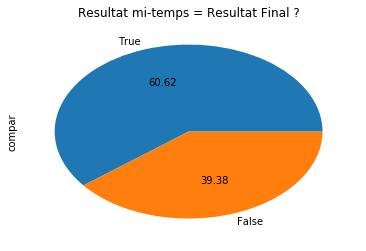

In [17]:
df['compar'].value_counts().plot(kind='pie', title = 'Resultat mi-temps = Resultat Final ?', autopct='%.2f')

Pour 6 matchs sur 10, le résultat à la mi-temps est confirmé à la fin du temps règlemantaire. Intéressons-nous plus précisement au résultat final dans les 3 cas suivants à la mi-temps: lorsque l'équipe à domicile est mène, lorsque l'équipe jouant à l'extérieur mène et lorsque qu'il y a égalité entre les deux équipes.

In [18]:
half_home = df.loc[df['HTR'] == 'H']

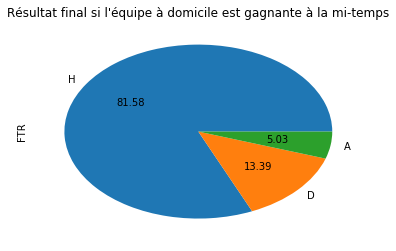

In [19]:
half_home['FTR'].value_counts().plot(kind='pie', title = "Résultat final si l'équipe à domicile est gagnante à la mi-temps", autopct='%.2f')

Nous observons que dans plus de 80% des matchs les équipes qui ont l'avantage à la mi-temps confirment cet avantage en gagnant le match à la fin du temps règlementaire.

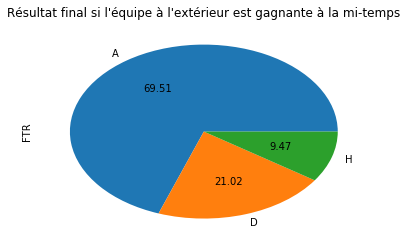

In [20]:
half_away = df.loc[df['HTR'] == 'A']
half_away['FTR'].value_counts().plot(kind='pie',title = "Résultat final si l'équipe à l'extérieur est gagnante à la mi-temps", autopct='%.2f')

Même si une très grande proportion des matchs menés à la mi-temps par l'équipe extérieure est gagnée par cette même équipe, pour 30% des matchs, ce n'est pas le cas et l'équipe à domicile peut revenir au match nul ou renverser le match et le gagner.

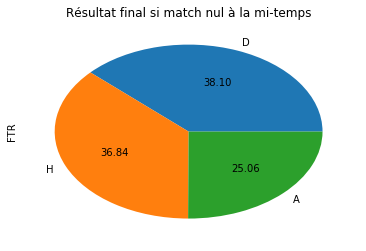

In [21]:
half_away = df.loc[df['HTR'] == 'D']
half_away['FTR'].value_counts().plot(kind='pie',title = "Résultat final si match nul à la mi-temps", autopct='%.2f')

Ici, il est intéressant de voir qu'à la mi-temps rien est joué, même si d'après les statistiques, l'issue du match semble moins favorable à la victoire de l'équipe à l'extérieur.

Création de la variable dichotomique correspondant la victoire de l'équipe à domicile, la victoire de l'équipe jouant à l'extérieur ou au match nul

In [22]:
df['Home_Win'] = np.where(df['FTR'] == 'H',1,0)
df['Away_Win'] = np.where(df['FTR'] == 'A',1,0)
df['Draw'] = np.where(df['FTR'] == 'D',1,0)

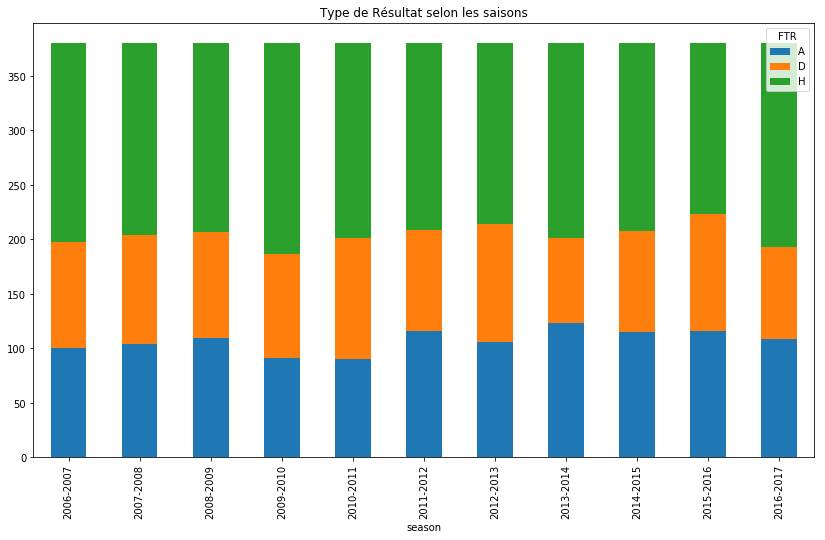

In [23]:
df.groupby(['FTR'])['season'].value_counts().unstack(0).plot.bar(stacked=True,title="Type de Résultat selon les saisons", figsize=(14,8))

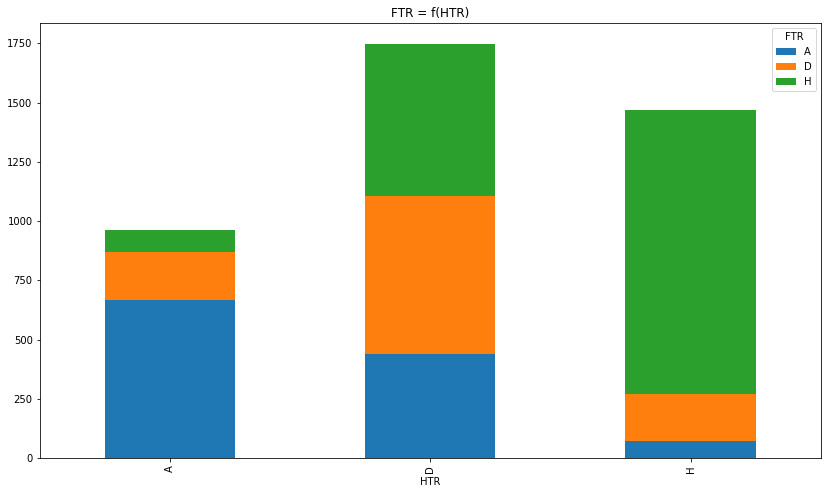

In [24]:
df.groupby(['FTR'])['HTR'].value_counts().unstack(0).plot.bar(stacked=True,title="FTR = f(HTR)", figsize=(14,8))

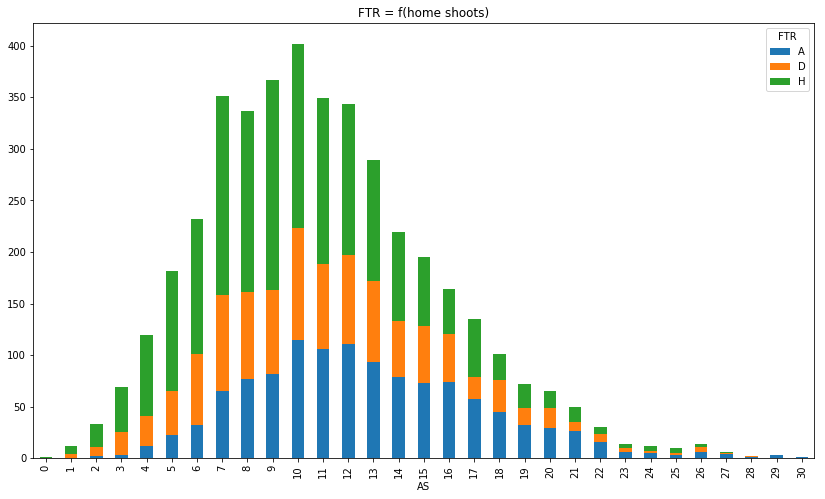

In [25]:
df.groupby(['FTR'])['AS'].value_counts().unstack(0).plot.bar(stacked=True,title="FTR = f(home shoots)", figsize=(14,8))

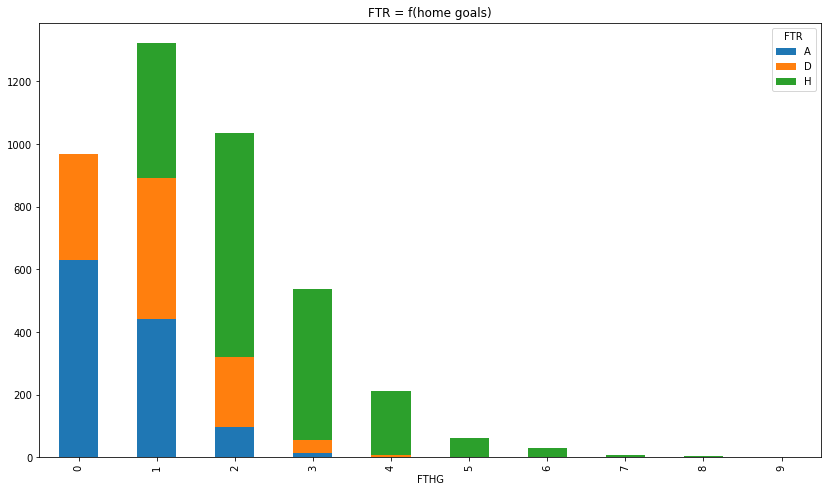

In [26]:
df.groupby(['FTR'])['FTHG'].value_counts().unstack(0).plot.bar(stacked=True,title="FTR = f(home goals)", figsize=(14,8))

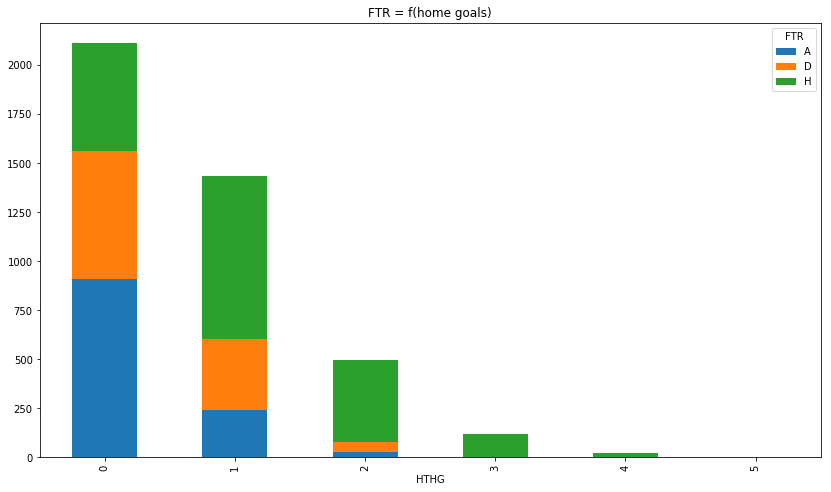

In [27]:
df.groupby(['FTR'])['HTHG'].value_counts().unstack(0).plot.bar(stacked=True,title="FTR = f(home goals)", figsize=(14,8))

Manipulation de tables afin d'obtenir les données générales des matchs sur toutes les saisons en une table

In [28]:
sum_home = df['HS'].groupby([df['season'], 
                             df['HomeTeam']]).sum().reset_index()

In [29]:
sum_away = df['AS'].groupby([df['season'], 
                             df['AwayTeam']]).sum().reset_index()

In [30]:
sum_home = pd.merge(sum_home,
                    df['Home_Win'].groupby([df['season'], 
                                                     df['HomeTeam']]).sum().reset_index(),
                    on =['HomeTeam','season'])

In [31]:
sum_away = pd.merge(sum_away,
                    df['Away_Win'].groupby([df['season'], 
                                            df['AwayTeam']]).sum().reset_index(),
                    on =['AwayTeam','season'])

In [32]:
sum_home = pd.merge(sum_home,
                    df['Draw'].groupby([df['season'], 
                                        df['HomeTeam']]).sum().reset_index(),
                    on =['HomeTeam','season'])

In [33]:
sum_away = pd.merge(sum_away,
                    df['Draw'].groupby([df['season'], 
                                        df['AwayTeam']]).sum().reset_index(),
                    on =['AwayTeam','season'])

In [34]:
sum_home = pd.merge(sum_home,df['FTHG'].groupby([df['season'], 
                                                 df['HomeTeam']]).sum().reset_index(),
                    on =['HomeTeam','season'])

In [35]:
sum_away = pd.merge(sum_away,
                    df['FTAG'].groupby([df['season'], 
                                        df['AwayTeam']]).sum().reset_index(),
                    on =['AwayTeam','season'])

In [36]:
sum_home = pd.merge(sum_home,
                    df['HST'].groupby([df['season'], 
                                       df['HomeTeam']]).sum().reset_index(),
                    on =['HomeTeam','season'])

In [37]:
sum_away = pd.merge(sum_away,
                    df['AST'].groupby([df['season'], 
                                       df['AwayTeam']]).sum().reset_index(),
                    on =['AwayTeam','season'])

In [38]:
sum_home = pd.merge(sum_home,
                    df['HF'].groupby([df['season'], 
                                      df['HomeTeam']]).sum().reset_index(),
                    on =['HomeTeam','season'])

In [39]:
sum_away = pd.merge(sum_away,
                    df['AF'].groupby([df['season'], 
                                      df['AwayTeam']]).sum().reset_index(),
                    on =['AwayTeam','season'])

In [40]:
sum_home = pd.merge(sum_home,
                    df['HC'].groupby([df['season'], 
                                      df['HomeTeam']]).sum().reset_index(),
                    on =['HomeTeam','season'])

In [41]:
sum_away = pd.merge(sum_away,
                    df['AC'].groupby([df['season'], 
                                      df['AwayTeam']]).sum().reset_index(),
                    on =['AwayTeam','season'])

In [42]:
sum_home = pd.merge(sum_home,
                    df['HY'].groupby([df['season'], 
                                      df['HomeTeam']]).sum().reset_index(),
                    on =['HomeTeam','season'])

In [43]:
sum_away = pd.merge(sum_away,
                    df['AY'].groupby([df['season'], 
                                               df['AwayTeam']]).sum().reset_index(),
                    on =['AwayTeam','season'])

In [44]:
sum_home = pd.merge(sum_home,
                    df['HR'].groupby([df['season'], 
                                      df['HomeTeam']]).sum().reset_index(),
                    on =['HomeTeam','season'])

In [45]:
sum_away = pd.merge(sum_away,
                    df['AR'].groupby([df['season'], 
                                      df['AwayTeam']]).sum().reset_index(),
                    on =['AwayTeam','season'])

In [46]:
sum_home = pd.merge(sum_home,
                    df['B365H'].groupby([df['season'], 
                                         df['HomeTeam']]).mean().reset_index(),
                    on =['HomeTeam','season'])

In [47]:
sum_away = pd.merge(sum_away,
                    df['B365A'].groupby([df['season'], 
                                         df['AwayTeam']]).mean().reset_index(),
                    on =['AwayTeam','season'])

In [48]:
sum_home = pd.merge(sum_home,
                    df['HTHG'].groupby([df['season'], 
                                        df['HomeTeam']]).mean().reset_index(),
                    on =['HomeTeam','season'])

In [49]:
sum_away = pd.merge(sum_away,
                    df['HTAG'].groupby([df['season'], 
                                        df['AwayTeam']]).mean().reset_index(),
                    on =['AwayTeam','season'])

In [50]:
sum_home = sum_home.rename(columns={'HomeTeam': 'team', 'B365H':'home_odd', 'Draw': 'Draw_at_home'})
sum_away = sum_away.rename(columns={'AwayTeam': 'team', 'B365A':'away_odd', 'Draw': 'Draw_away'})

In [51]:
sum_merge = pd.merge(sum_home,
                     sum_away, on = ['team','season'])

In [52]:
sum_merge.head()

,season,team,HS,Home_Win,Draw_at_home,FTHG,HST,HF,HC,HY,...,Away_Win,Draw_away,FTAG,AST,AF,AC,AY,AR,away_odd,HTAG
0,2006-2007,Arsenal,299,12,6,43,171,190,169,27,...,7,5,20,105,178,109,32,3,2.194737,0.421053
1,2006-2007,Aston Villa,222,7,8,20,109,241,117,22,...,4,9,23,102,259,96,26,1,4.680000,0.631579
2,2006-2007,Blackburn,234,9,3,31,118,280,110,41,...,6,4,21,90,247,93,40,3,4.431579,0.473684
3,2006-2007,Bolton,207,9,5,26,115,248,125,29,...,7,3,21,69,273,90,53,4,3.880000,0.473684
4,2006-2007,Charlton,216,7,5,19,107,224,108,29,...,1,5,15,61,204,72,29,3,6.391053,0.263158


In [53]:
sum_stat_merge = pd.merge(stats,sum_merge, 
                          on = ['team','season'])

In [54]:
sum_stat_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 220 entries, 0 to 219
Data columns (total 65 columns):
season                  220 non-null object
team                    220 non-null object
classement              220 non-null int64
wins                    220 non-null float64
losses                  220 non-null float64
goals                   220 non-null float64
total_yel_card          220 non-null float64
total_red_card          220 non-null float64
total_scoring_att       220 non-null float64
ontarget_scoring_att    220 non-null float64
hit_woodwork            220 non-null float64
att_hd_goal             220 non-null float64
att_pen_goal            220 non-null float64
att_freekick_goal       220 non-null float64
att_ibox_goal           220 non-null float64
att_obox_goal           220 non-null float64
goal_fastbreak          220 non-null float64
total_offside           220 non-null float64
clean_sheet             220 non-null float64
goals_conceded          220 non-null float64

In [55]:
sum_stat_merge.head()

,season,team,classement,wins,losses,goals,total_yel_card,total_red_card,total_scoring_att,ontarget_scoring_att,...,Away_Win,Draw_away,FTAG,AST,AF,AC,AY,AR,away_odd,HTAG
0,2006-2007,Arsenal,4,19.0,8.0,63.0,59.0,3.0,638.0,226.0,...,7,5,20,105,178,109,32,3,2.194737,0.421053
1,2007-2008,Arsenal,3,24.0,3.0,74.0,55.0,3.0,627.0,208.0,...,10,6,37,139,208,97,39,2,2.058947,0.684211
2,2008-2009,Arsenal,4,20.0,6.0,68.0,58.0,3.0,662.0,220.0,...,9,7,37,140,219,113,35,2,2.437895,0.684211
3,2009-2010,Arsenal,3,23.0,9.0,83.0,56.0,1.0,660.0,233.0,...,8,4,35,142,226,126,32,0,2.083158,0.894737
4,2010-2011,Arsenal,4,19.0,8.0,72.0,65.0,6.0,654.0,238.0,...,8,7,39,156,208,114,37,3,2.166316,1.157895


In [56]:
home_odd = pd.DataFrame(df['B365H'].groupby([df['HomeTeam'], 
                                             df['season']]).mean().reset_index())

In [57]:
away_odd = pd.DataFrame(df['B365A'].groupby([df['AwayTeam'], 
                                             df['season']]).mean().reset_index())

In [58]:
draw_odd_home = pd.DataFrame(df['B365D'].groupby([df['HomeTeam'], 
                                                  df['season']]).mean().reset_index())

In [59]:
draw_odd_away = pd.DataFrame(df['B365D'].groupby([df['AwayTeam'], 
                                                  df['season']]).mean().reset_index())

In [60]:
away_odd = away_odd.rename(columns={'AwayTeam': 'team'})
home_odd = home_odd.rename(columns={'HomeTeam': 'team'})
draw_odd_home = draw_odd_home.rename(columns={'HomeTeam': 'team'})
draw_odd_away = draw_odd_away.rename(columns={'AwayTeam': 'team'})

In [61]:
merged = pd.merge(stats,away_odd, 
                  on=['team','season'], 
                  how='left')

In [62]:
merged = pd.merge(merged,home_odd, 
                  on=['team','season'], 
                  how='left')

In [63]:
merged = pd.merge(merged,draw_odd_away, 
                  on=['team','season'], 
                  how='left')

In [64]:
merged = pd.merge(merged,draw_odd_home, 
                  on=['team','season'], 
                  how='left')

In [65]:
merged = merged.rename(columns={'B365A': 'mean_away_odd', 'B365H' : 'mean_home_odd',
                               'B365D_x': 'mean_draw_away_odd', 'B365D_y':'mean_draw_home_odd'})

In [66]:
merged.head()

,season,team,classement,wins,losses,goals,total_yel_card,total_red_card,total_scoring_att,ontarget_scoring_att,...,big_chance_missed,clearance_off_line,dispossessed,penalty_save,total_high_claim,punches,mean_away_odd,mean_home_odd,mean_draw_away_odd,mean_draw_home_odd
0,2006-2007,Arsenal,4,19.0,8.0,63.0,59.0,3.0,638.0,226.0,...,NaN,1.0,NaN,0.0,88.0,27.0,2.194737,1.524737,3.486842,4.353684
1,2007-2008,Arsenal,3,24.0,3.0,74.0,55.0,3.0,627.0,208.0,...,NaN,2.0,776.0,1.0,45.0,26.0,2.058947,1.506316,3.665789,4.723684
2,2008-2009,Arsenal,4,20.0,6.0,68.0,58.0,3.0,662.0,220.0,...,NaN,9.0,692.0,2.0,65.0,26.0,2.437895,1.609474,3.607895,4.366842
3,2009-2010,Arsenal,3,23.0,9.0,83.0,56.0,1.0,660.0,233.0,...,NaN,3.0,713.0,2.0,75.0,24.0,2.083158,1.507895,3.781579,5.263158
4,2010-2011,Arsenal,4,19.0,8.0,72.0,65.0,6.0,654.0,238.0,...,88.0,4.0,601.0,2.0,56.0,25.0,2.166316,1.486316,3.700000,5.104211


In [67]:
merged.head()

,season,team,classement,wins,losses,goals,total_yel_card,total_red_card,total_scoring_att,ontarget_scoring_att,...,big_chance_missed,clearance_off_line,dispossessed,penalty_save,total_high_claim,punches,mean_away_odd,mean_home_odd,mean_draw_away_odd,mean_draw_home_odd
0,2006-2007,Arsenal,4,19.0,8.0,63.0,59.0,3.0,638.0,226.0,...,NaN,1.0,NaN,0.0,88.0,27.0,2.194737,1.524737,3.486842,4.353684
1,2007-2008,Arsenal,3,24.0,3.0,74.0,55.0,3.0,627.0,208.0,...,NaN,2.0,776.0,1.0,45.0,26.0,2.058947,1.506316,3.665789,4.723684
2,2008-2009,Arsenal,4,20.0,6.0,68.0,58.0,3.0,662.0,220.0,...,NaN,9.0,692.0,2.0,65.0,26.0,2.437895,1.609474,3.607895,4.366842
3,2009-2010,Arsenal,3,23.0,9.0,83.0,56.0,1.0,660.0,233.0,...,NaN,3.0,713.0,2.0,75.0,24.0,2.083158,1.507895,3.781579,5.263158
4,2010-2011,Arsenal,4,19.0,8.0,72.0,65.0,6.0,654.0,238.0,...,88.0,4.0,601.0,2.0,56.0,25.0,2.166316,1.486316,3.700000,5.104211


In [68]:
away_sort =  merged.sort_values(by = ['season','mean_home_odd'], 
                                ascending = True)

In [69]:
away = away_sort[['season','team','classement','mean_away_odd']]

In [70]:
away['classement_odd'] = away.groupby('season')['team'].cumcount() + 1

C:\Users\marie\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


Dans les prochains codes, nous allons comparer le classement final par saison et le classement effectué à partir de la moyenne des côtes sur la saison. Il est difficile d'avoir exactement le même classement c'est pourquoi nous créons des classes: par exemple, si le classement final est compris entre 1 et 5 et que le classement par côte est également compris entre 1 et 5, nous estimons que la prédiction venant des paris sportifs est bonne.

In [71]:
import operator
conditions = [
    (operator.and_(away['classement']<=5, away['classement_odd']<=5)),
    (operator.and_(operator.and_(away['classement'] > 5,away['classement'] <= 10), 
                   operator.and_(away['classement_odd'] > 5,away['classement_odd'] <= 10))),
    (operator.and_(operator.and_(away['classement'] > 10,away['classement'] <= 15), 
                    operator.and_(away['classement_odd'] > 10,away['classement_odd'] <= 15))),
    (operator.and_(operator.and_(away['classement'] > 15,away['classement'] <= 20), 
                   operator.and_(away['classement_odd'] > 15,away['classement_odd'] <= 20)))
                   ]
choices = ['Bonne prédiction', 'Bonne prédiction', 'Bonne prédiction','Bonne prédiction']
away['compar'] = np.select(conditions, choices, default='Mauvaise prédiction')

C:\Users\marie\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


In [72]:
away.head(20)

,season,team,classement,mean_away_odd,classement_odd,compar
44,2006-2007,Chelsea,2,1.653158,1,Bonne prédiction
109,2006-2007,Man United,1,1.755789,2,Bonne prédiction
0,2006-2007,Arsenal,4,2.194737,3,Bonne prédiction
87,2006-2007,Liverpool,3,2.256842,4,Bonne prédiction
178,2006-2007,Tottenham,5,3.324211,5,Bonne prédiction
31,2006-2007,Bolton,7,3.880000,6,Bonne prédiction
60,2006-2007,Everton,6,3.901053,7,Bonne prédiction
137,2006-2007,Portsmouth,9,4.348421,8,Bonne prédiction
124,2006-2007,Newcastle,13,4.968947,9,Mauvaise prédiction
11,2006-2007,Aston Villa,11,4.680000,10,Mauvaise prédiction


In [73]:
home_sort = merged.sort_values(by = ['season','mean_home_odd'], ascending = True)

In [74]:
home = home_sort[['season','team','classement','mean_home_odd']]

In [75]:
home['classement_odd'] = home.groupby('season').cumcount() + 1

C:\Users\marie\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [76]:
conditions = [
    (operator.and_(home['classement']<=5, home['classement_odd']<=5)),
    (operator.and_(operator.and_(home['classement'] > 5,home['classement'] <= 10), 
                   operator.and_(home['classement_odd'] > 5,home['classement_odd'] <= 10))),
    (operator.and_(operator.and_(home['classement'] > 10,home['classement'] <= 15), 
                   operator.and_(home['classement_odd'] > 10,home['classement_odd'] <= 15))),
    (operator.and_(operator.and_(home['classement'] > 15,home['classement'] <= 20), 
                   operator.and_(home['classement_odd'] > 15,home['classement_odd'] <= 20)))
                   ]
choices = ['Bonne prédiction', 'Bonne prédiction', 'Bonne prédiction','Bonne prédiction']
home['compar'] = np.select(conditions, choices, default='Mauvaise prédiction')


C:\Users\marie\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


In [77]:
home.head(20)

,season,team,classement,mean_home_odd,classement_odd,compar
44,2006-2007,Chelsea,2,1.359474,1,Bonne prédiction
109,2006-2007,Man United,1,1.408421,2,Bonne prédiction
0,2006-2007,Arsenal,4,1.524737,3,Bonne prédiction
87,2006-2007,Liverpool,3,1.606316,4,Bonne prédiction
178,2006-2007,Tottenham,5,2.139474,5,Bonne prédiction
31,2006-2007,Bolton,7,2.361579,6,Bonne prédiction
60,2006-2007,Everton,6,2.425789,7,Bonne prédiction
137,2006-2007,Portsmouth,9,2.478947,8,Bonne prédiction
124,2006-2007,Newcastle,13,2.598947,9,Mauvaise prédiction
11,2006-2007,Aston Villa,11,2.602105,10,Mauvaise prédiction


### Modélisation 

In [78]:
sum_stat_merge.head()

,season,team,classement,wins,losses,goals,total_yel_card,total_red_card,total_scoring_att,ontarget_scoring_att,...,Away_Win,Draw_away,FTAG,AST,AF,AC,AY,AR,away_odd,HTAG
0,2006-2007,Arsenal,4,19.0,8.0,63.0,59.0,3.0,638.0,226.0,...,7,5,20,105,178,109,32,3,2.194737,0.421053
1,2007-2008,Arsenal,3,24.0,3.0,74.0,55.0,3.0,627.0,208.0,...,10,6,37,139,208,97,39,2,2.058947,0.684211
2,2008-2009,Arsenal,4,20.0,6.0,68.0,58.0,3.0,662.0,220.0,...,9,7,37,140,219,113,35,2,2.437895,0.684211
3,2009-2010,Arsenal,3,23.0,9.0,83.0,56.0,1.0,660.0,233.0,...,8,4,35,142,226,126,32,0,2.083158,0.894737
4,2010-2011,Arsenal,4,19.0,8.0,72.0,65.0,6.0,654.0,238.0,...,8,7,39,156,208,114,37,3,2.166316,1.157895


In [79]:
sum_stat_merge.columns

Index(['season', 'team', 'classement', 'wins', 'losses', 'goals',
       'total_yel_card', 'total_red_card', 'total_scoring_att',
       'ontarget_scoring_att', 'hit_woodwork', 'att_hd_goal', 'att_pen_goal',
       'att_freekick_goal', 'att_ibox_goal', 'att_obox_goal', 'goal_fastbreak',
       'total_offside', 'clean_sheet', 'goals_conceded', 'saves',
       'outfielder_block', 'interception', 'total_tackle', 'last_man_tackle',
       'total_clearance', 'head_clearance', 'own_goals', 'penalty_conceded',
       'pen_goals_conceded', 'total_pass', 'total_through_ball',
       'total_long_balls', 'backward_pass', 'total_cross', 'corner_taken',
       'touches', 'big_chance_missed', 'clearance_off_line', 'dispossessed',
       'penalty_save', 'total_high_claim', 'punches', 'HS', 'Home_Win',
       'Draw_at_home', 'FTHG', 'HST', 'HF', 'HC', 'HY', 'HR', 'home_odd',
       'HTHG', 'AS', 'Away_Win', 'Draw_away', 'FTAG', 'AST', 'AF', 'AC', 'AY',
       'AR', 'away_odd', 'HTAG'],
      dtype='ob

Nous décidons d'effectuer une régression linéaire pour essayer de voir si la cote moyenne de l'année N est influencée par les statistiques de l'année N-1. Pour cela, nous devons créer des variables retardées :  

In [80]:
features=['classement', 'wins', 'losses', 'goals',
       'total_yel_card', 'total_red_card', 'total_scoring_att',
       'ontarget_scoring_att', 'hit_woodwork', 'att_hd_goal', 'att_pen_goal',
       'att_freekick_goal', 'att_ibox_goal', 'att_obox_goal', 'goal_fastbreak',
       'total_offside', 'clean_sheet', 'goals_conceded',
       'outfielder_block', 'interception', 'total_tackle', 'last_man_tackle',
       'total_clearance', 'own_goals', 'penalty_conceded',
       'pen_goals_conceded', 'total_pass',
       'total_long_balls', 'total_cross', 'corner_taken',
       'touches', 'clearance_off_line', 'dispossessed',
       'penalty_save', 'total_high_claim', 'punches', 'HS', 'Home_Win',
       'Draw_at_home', 'FTHG', 'HST', 'HF', 'HC', 'HY', 'HR', 'home_odd',
       'HTHG', 'AS', 'Away_Win', 'Draw_away', 'FTAG', 'AST', 'AF', 'AC', 'AY',
       'AR', 'away_odd', 'HTAG']
for f in features:
    sum_stat_merge[f + '_lag']=sum_stat_merge.groupby('team')[f].shift(1)

Nous enlevons les valeurs manquantes afin qu'elles ne soient pas prises en compte. 

In [81]:
sum_stat_merge.dropna(axis=0, inplace=True)

Nous ne gardons que les variables qui nous intéressent. 

In [82]:
df_model = sum_stat_merge[['classement_lag', 'wins_lag', 'losses_lag', 'goals_lag',
       'total_yel_card_lag', 'total_red_card_lag', 'total_scoring_att_lag',
       'ontarget_scoring_att_lag', 'hit_woodwork_lag', 'att_hd_goal_lag', 'att_pen_goal_lag',
       'att_freekick_goal_lag', 'att_ibox_goal_lag', 'att_obox_goal_lag', 'goal_fastbreak_lag',
       'total_offside_lag', 'clean_sheet_lag', 'goals_conceded_lag',
       'outfielder_block_lag', 'interception_lag', 'total_tackle_lag', 'last_man_tackle_lag',
       'total_clearance_lag', 'own_goals_lag', 'penalty_conceded_lag',
       'pen_goals_conceded_lag', 'total_pass_lag',
       'total_long_balls_lag', 'total_cross_lag', 'corner_taken_lag',
       'touches_lag', 'clearance_off_line_lag', 'dispossessed_lag',
       'penalty_save_lag', 'total_high_claim_lag', 'punches_lag', 'HS_lag', 'Home_Win_lag',
       'Draw_at_home_lag', 'FTHG_lag', 'HST_lag', 'HF_lag', 'HC_lag', 'HY_lag', 'HR_lag', 'home_odd_lag',
       'HTHG_lag', 'AS_lag', 'Away_Win_lag', 'Draw_away_lag', 'FTAG_lag', 'AST_lag', 'AF_lag','AC_lag', 'AY_lag',
       'AR_lag', 'away_odd_lag', 'HTAG_lag','home_odd']]

Nous séparons le dataset en un échantillon d'apprentissage et un autre où nous testerons le modèle. 

In [125]:
from sklearn.model_selection import train_test_split

In [83]:
X = sum_stat_merge[['classement_lag', 'wins_lag', 'losses_lag', 'goals_lag',
       'total_yel_card_lag', 'total_red_card_lag', 'total_scoring_att_lag',
       'ontarget_scoring_att_lag', 'hit_woodwork_lag', 'att_hd_goal_lag', 'att_pen_goal_lag',
       'att_freekick_goal_lag', 'att_ibox_goal_lag', 'att_obox_goal_lag', 'goal_fastbreak_lag',
       'total_offside_lag', 'clean_sheet_lag', 'goals_conceded_lag',
       'outfielder_block_lag', 'interception_lag', 'total_tackle_lag', 'last_man_tackle_lag',
       'total_clearance_lag', 'own_goals_lag', 'penalty_conceded_lag',
       'pen_goals_conceded_lag', 'total_pass_lag',
       'total_long_balls_lag', 'total_cross_lag', 'corner_taken_lag',
       'touches_lag', 'clearance_off_line_lag', 'dispossessed_lag',
       'penalty_save_lag', 'total_high_claim_lag', 'punches_lag', 'HS_lag', 'Home_Win_lag',
       'Draw_at_home_lag', 'FTHG_lag', 'HST_lag', 'HF_lag', 'HC_lag', 'HY_lag', 'HR_lag', 'home_odd_lag',
       'HTHG_lag', 'AS_lag', 'Away_Win_lag', 'Draw_away_lag', 'FTAG_lag', 'AST_lag', 'AF_lag','AC_lag', 'AY_lag',
       'AR_lag', 'away_odd_lag', 'HTAG_lag']]
y = sum_stat_merge['home_odd']

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [85]:
est = sm.OLS(y_train, X_train)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:               home_odd   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     8.616
Date:                Sat, 30 Mar 2019   Prob (F-statistic):           4.28e-10
Time:                        00:01:40   Log-Likelihood:                 1.6661
No. Observations:                  91   AIC:                             106.7
Df Residuals:                      36   BIC:                             244.8
Df Model:                          54                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
classement_lag          

Nous avons inclu dans ce modèle l'ensemble des variables présentes dans la table. Nous voyons que le R² est à 0.93 ce qui peut paraitre très bon. Toutefois, le modèle ici présent est loin d'être optimal puisqu'énormément de variables ne sont pas significaitves et que nous avons un probèle de multicolinéarité. 

Nous recommençons la même démarche en intégrant dans le modèle uniquement les variables qui étaient significatives précédemment. 

In [86]:
X = sum_stat_merge[['HR_lag','Draw_at_home_lag','Home_Win_lag',
'HS_lag','att_freekick_goal_lag','total_red_card_lag',
'total_scoring_att_lag',
'classement_lag']]
y = sum_stat_merge['home_odd']

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [89]:
est = sm.OLS(y_train, X_train)
est3 = est.fit()
print(est3.summary())

                            OLS Regression Results                            
Dep. Variable:               home_odd   R-squared:                       0.975
Model:                            OLS   Adj. R-squared:                  0.973
Method:                 Least Squares   F-statistic:                     409.5
Date:                Sat, 30 Mar 2019   Prob (F-statistic):           2.57e-63
Time:                        00:02:08   Log-Likelihood:                -54.422
No. Observations:                  91   AIC:                             124.8
Df Residuals:                      83   BIC:                             144.9
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
HR_lag                    0.14

Nous n'avons plus de problème de colinéarité et le R² a même augmenté. 
Néanmoins, du fait de la spécificité des variables que nous avons ici. Il se pourrait que d'autres modèles soient plus performants et mettent en lumière plus de relations entre nos variables. 

In [90]:
est_df = pd.DataFrame()
est_df['True Y'] = y_test

In [91]:
est_df['Predicted Y'] = est3.predict(X_test)

In [92]:
est_df['Diff'] = (est_df['True Y'] - est_df['Predicted Y'])

In [93]:
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

In [94]:
est_df.head()

,True Y,Predicted Y,Diff
103,1.413158,2.014826,-0.601669
77,2.764211,2.684538,0.079672
40,3.976842,3.816267,0.160575
64,2.074211,2.620113,-0.545902
196,3.188947,2.245889,0.943058


In [95]:
rmse(est_df['Predicted Y'],est_df['True Y'])

0.6270259411378682

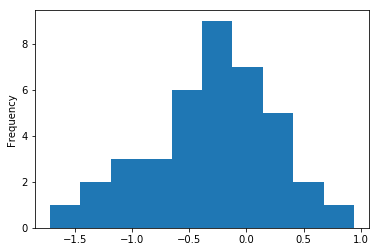

In [96]:
est_df['Diff'].plot(kind='hist')

Nous nous sommes ensuite interessées à la probabilité que l'équipe à domicile gagne le match. 
Pour ce faire, nous avons utilisé la Régression Logistique. 

In [97]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix  

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [98]:
df.head()

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,...,BbAvA,BbMx>2.5,BbAv>2.5,BbMx<2.5,BbAv<2.5,season,compar,Home_Win,Away_Win,Draw
0,19/08/2006,Arsenal,Aston Villa,1,1,D,0,0,D,G Poll,...,10.72,1.83,1.75,2.12,2.01,2006-2007,True,0,0,1
1,19/08/2006,Bolton,Tottenham,2,0,H,2,0,H,P Dowd,...,2.53,2.30,2.17,1.75,1.63,2006-2007,True,1,0,0
2,19/08/2006,Everton,Watford,2,1,H,1,0,H,P Walton,...,5.35,2.20,2.07,1.76,1.69,2006-2007,True,1,0,0
3,19/08/2006,Newcastle,Wigan,2,1,H,1,0,H,M Atkinson,...,4.72,2.25,2.12,1.75,1.66,2006-2007,True,1,0,0
4,19/08/2006,Portsmouth,Blackburn,3,0,H,1,0,H,A Wiley,...,2.83,2.26,2.15,1.69,1.64,2006-2007,True,1,0,0


Nous avons créé ici notre variable dépendante dichotomique et nous effectuons quelques statistiques descriptives. 

In [101]:
df['Home_Win'].value_counts()

0    2245
1    1935
Name: Home_Win, dtype: int64

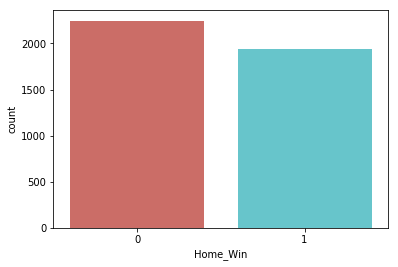

In [102]:
sns.countplot(x='Home_Win', data=df, palette='hls')
plt.show()

In [103]:
count_loss = len(df[df['Home_Win']==0])
count_win = len(df[df['Home_Win']==1])
pct_of_win = (count_win/(count_win+count_loss))*100
print("Pourcentage de matchs gagnés par l'équipe à domicile", pct_of_win)
pct_of_loss = (count_loss/(count_win+count_loss))*100
print("Pourcentage de matchs perdus par l'équipe à domicile", pct_of_loss)

Pourcentage de matchs gagnés par l'équipe à domicile 46.291866028708135
Pourcentage de matchs perdus par l'équipe à domicile 53.70813397129187


In [104]:
df.groupby('Home_Win').mean()

,FTHG,FTAG,HTHG,HTAG,HS,AS,HST,AST,HC,AC,...,BbMxD,BbAvD,BbMxA,BbAvA,BbMx>2.5,BbAv>2.5,BbMx<2.5,BbAv<2.5,Away_Win,Draw
Home_Win,,,,,,,,,,,,,,,,,,,,,
0,0.774610,1.673051,0.345212,0.722494,12.930958,11.865033,5.583519,5.740757,6.066815,4.930512,...,3.870428,3.628379,3.935145,3.549167,2.031613,1.927742,1.975501,1.877572,0.525612,0.474388
1,2.437209,0.530233,1.084755,0.231008,15.142636,9.969509,7.621705,4.333333,6.256331,4.731266,...,4.384630,4.042563,7.024031,5.995649,1.966057,1.868377,2.075318,1.962951,0.000000,0.000000


In [105]:
df.columns

Index(['Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HTHG', 'HTAG',
       'HTR', 'Referee', 'HS', 'AS', 'HST', 'AST', 'HC', 'AC', 'HF', 'AF',
       'HY', 'AY', 'HR', 'AR', 'B365H', 'B365A', 'B365D', 'BbMxH', 'BbAvH',
       'BbMxD', 'BbAvD', 'BbMxA', 'BbAvA', 'BbMx>2.5', 'BbAv>2.5', 'BbMx<2.5',
       'BbAv<2.5', 'season', 'compar', 'Home_Win', 'Away_Win', 'Draw'],
      dtype='object')

In [106]:
X = df[['HTHG', 'HTAG',
        'HS', 'AS', 'HST', 'AST', 'HC', 'AC', 'HF', 'AF',
       'HY', 'AY', 'HR', 'AR', 'B365H', 'B365A', 'B365D', 'BbMxH', 'BbAvH',
       'BbMxD', 'BbAvD', 'BbMxA', 'BbAvA', 'BbMx>2.5', 'BbAv>2.5', 'BbMx<2.5',
       'BbAv<2.5']]
y = df['Home_Win']

In [107]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [108]:
logreg = LogisticRegression(solver='lbfgs', max_iter = 10000)
est = logreg.fit(X_train, y_train.values.ravel())

In [109]:
logit_model=sm.Logit(y_train,X_train)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.433804
         Iterations 7
                          Results: Logit
Model:              Logit            Pseudo R-squared: 0.372      
Dependent Variable: Home_Win         AIC:              2592.6211  
Date:               2019-03-30 00:04 BIC:              2754.1187  
No. Observations:   2926             Log-Likelihood:   -1269.3    
Df Model:           26               LL-Null:          -2020.7    
Df Residuals:       2899             LLR p-value:      3.1019e-301
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     7.0000                                        
-------------------------------------------------------------------
               Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
HTHG           1.4852    0.0817   18.1878  0.0000   1.3251   1.6452
HTAG          -1.4173    0.0980  -14.4612  0.0000

De manière évidente, toutes les variables ne sont pas significatives mais le modèle semble assez bon. 

In [110]:
y_pred_logit = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on train set: {:.2f}'.format(logreg.score(X_train, y_train)))
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on train set: 0.80
Accuracy of logistic regression classifier on test set: 0.78


Quasiment 80% des victoires sont prédites correctement. 

In [112]:
print(confusion_matrix(y_test, y_pred_logit))

[[548 130]
 [144 432]]


In [113]:
print(classification_report(y_test, y_pred_logit))

              precision    recall  f1-score   support

           0       0.79      0.81      0.80       678
           1       0.77      0.75      0.76       576

   micro avg       0.78      0.78      0.78      1254
   macro avg       0.78      0.78      0.78      1254
weighted avg       0.78      0.78      0.78      1254



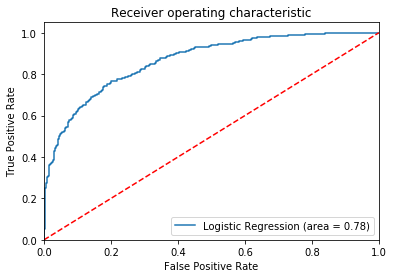

In [114]:
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

Les taux de faux positifs et faux négatids semmblent assez élevés mais nous pouvons relativiser et voir que le modèle est relativement bon puisque le score d'accuracy est à 80% et que l'aire sous la courbe ROC est de 0.78 (plus c'est prêt de 1 mieux c'est). 